# Compiling my 3 variables into one notebook without the extra clutter

1. RMS value of an event
2. ADC peak / maximum
3. ADC mean

In [1]:
!pip install uproot awkward 
from uproot_io import Events, View
import numpy as np
import matplotlib.pyplot as plt
import features as f

cheated_0 = Events('CheatedRecoFile_0.root')

# training and testing indices, we have 499617 events in cheated_0
start_training = 0
end_training = 399999
start_testing = 400000
end_testing = 499616

# other variables
cutoff = 20
plots = True


# find some events in the last 100k events that we will use for testing, these are JUST FOR DEMONSTRATION

testing_idx = []

for i in range(start_testing, end_testing + 1):
    n = len(cheated_0.reco_hits_w[i])
    if n > 200: # more than 200 hits, demonstration purposes only
        testing_idx.append(i)


# ROC curve function

def ROC(pdf): # takes a tuple of p_t, p_s as pdf
    p_t = pdf[0]
    p_s = pdf[1]
    eff = []
    pur = []

    for i in range(0, len(p_s)):
        
        shower_right = sum(p_s[i:])
        both_right = sum(p_s[i:]) + sum(p_t[i:])
        shower_all = sum(p_s)

        e = shower_right / shower_all
        
        # Check to avoid division by zero in purity calculation
        if both_right != 0:
            p = shower_right / both_right  # Purity
        else:
            p = 1  # or you could continue to the next iteration with "continue"

        eff.append(e)
        pur.append(p)

    plt.plot(eff, pur)
    plt.scatter(eff, pur, s=15, marker='x')
    plt.scatter(1, 1, c='orange', label="Ideal", s=15, marker='x')
    plt.xlabel("Efficiency")
    plt.ylabel("Purity")
    plt.title("Efficiency vs Purity Curve for picking a shower")
    plt.legend()
    plt.show()

  Using cached uproot-5.5.1-py3-none-any.whl.metadata (33 kB)
  Using cached awkward-2.7.1-py3-none-any.whl.metadata (7.0 kB)
  Using cached cramjam-2.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached awkward_cpp-42-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
Using cached uproot-5.5.1-py3-none-any.whl (362 kB)
Using cached awkward-2.7.1-py3-none-any.whl (863 kB)
Using cached awkward_cpp-42-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (637 kB)
Using cached cramjam-2.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.4 MB)


# RMS: var_rms

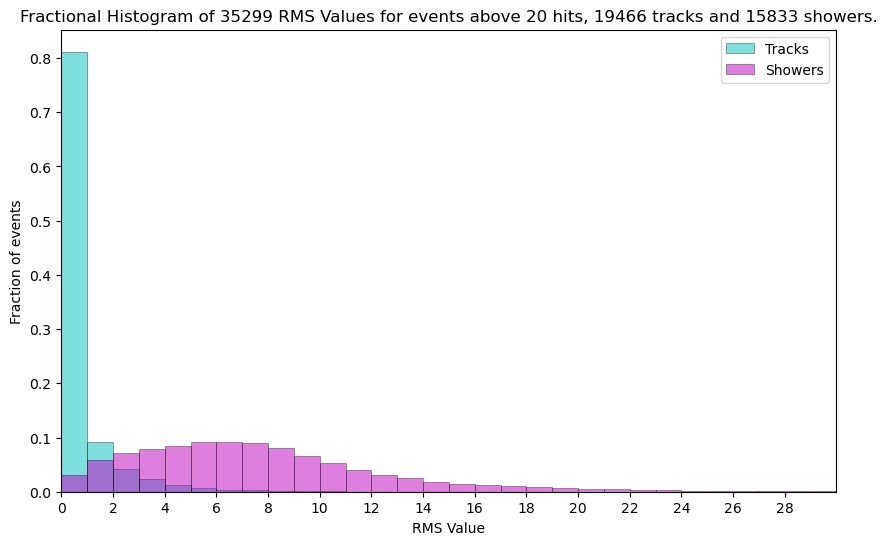

In [2]:
rms_pdf = f.var_rms(cheated_0, start_training, end_training, cutoff, plots)

In [3]:
# have a look at some random events in the latter 100k

for k in range(1,10):
    chosen_event = np.random.choice(testing_idx)
    p_t, p_s = f.p_rms(rms_pdf, cheated_0, chosen_event)
    
    L_track = p_t / (p_t + p_s)
    L_shower = p_s / (p_t + p_s)
    
    print(f'Event no. {chosen_event}')
    if L_track > L_shower:
        print(f'Likelihood of a track: {L_track}')
    else: print(f'Likelihood of a shower: {L_shower}')

Event no. 440751
Likelihood of a shower: 0.9919335246086121
Event no. 413173
Likelihood of a track: 0.9625463485717773
Event no. 446596
Likelihood of a track: 0.9625463485717773
Event no. 405475
Likelihood of a track: 0.9625463485717773
Event no. 449741
Likelihood of a track: 0.9625463485717773
Event no. 477833
Likelihood of a shower: 0.9883754253387451
Event no. 480160
Likelihood of a track: 0.9625463485717773
Event no. 452813
Likelihood of a shower: 0.9883754253387451
Event no. 493530
Likelihood of a track: 0.9625463485717773


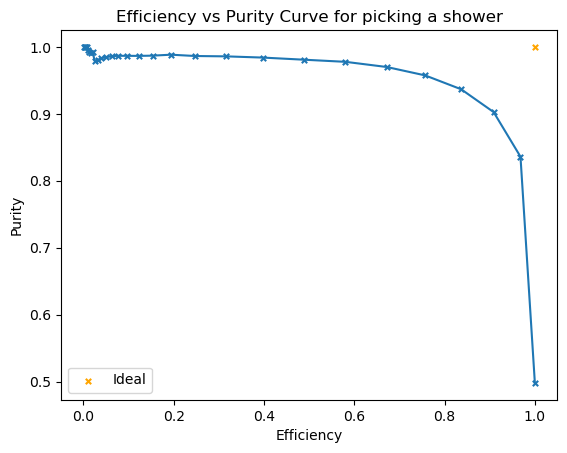

In [4]:
ROC(rms_pdf)

# ADC Max: var_adc_max

In [5]:
# not fixed yet

# ADC Mean: var_adc_mean

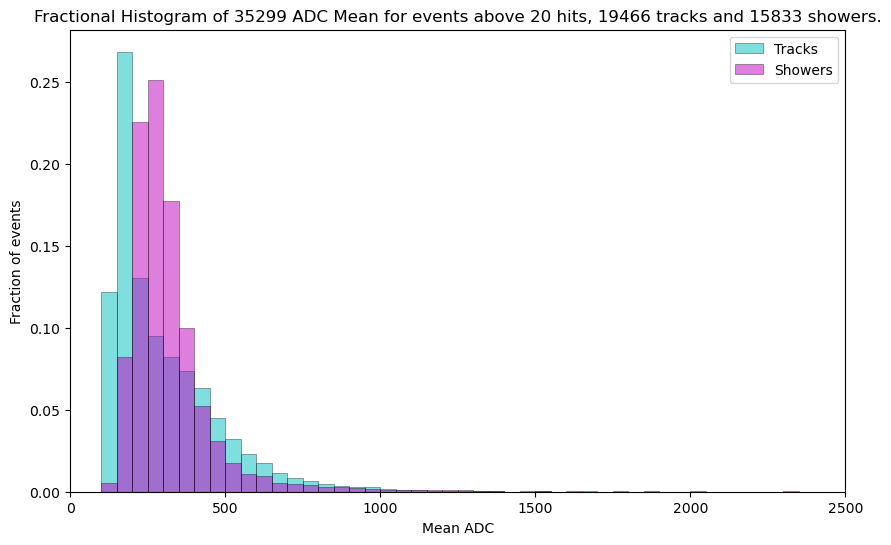

In [12]:
adc_mean_pdf = f.var_adc_mean(cheated_0, start_training, end_training, cutoff, plots)

In [10]:
# have a look at some random events in the latter 100k

for k in range(1,10):
    chosen_event = np.random.choice(testing_idx)
    p_t, p_s = f.p_adc_mean(adc_mean_pdf, cheated_0, chosen_event)
    
    L_track = p_t / (p_t + p_s)
    L_shower = p_s / (p_t + p_s)
    
    print(f'Event no. {chosen_event}')
    if L_track > L_shower:
        print(f'Likelihood of a track: {L_track}')
    else: print(f'Likelihood of a shower: {L_shower}')

Event no. 409420
Likelihood of a track: 0.8673468232154846
Event no. 422476
Likelihood of a shower: 0.6667453050613403
Event no. 454966
Likelihood of a shower: 0.7306768894195557
Event no. 478530
Likelihood of a track: 0.8673468232154846
Event no. 409420
Likelihood of a track: 0.8673468232154846
Event no. 494058
Likelihood of a track: 0.9938198328018188
Event no. 470232
Likelihood of a shower: 0.7022309303283691
Event no. 436277
Likelihood of a shower: 0.7022309303283691
Event no. 428270
Likelihood of a shower: 0.7022309303283691


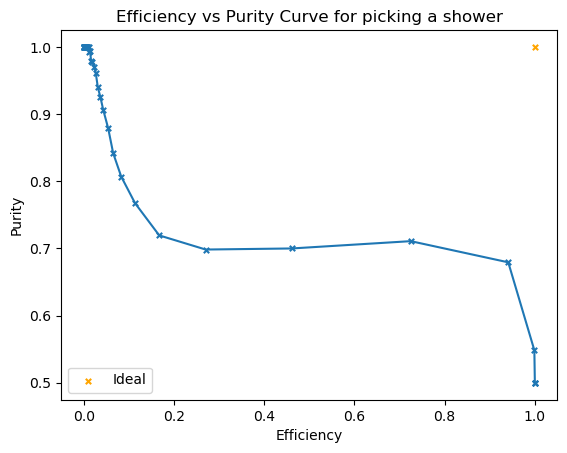

In [11]:
ROC(adc_mean_pdf)